In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_json('../Dataset_Clean.json')

In [5]:
# --- Define High-Stakes Keyword Categories ---
risk_categories = {
    "Security & Fraud": r'fraud|breach|hacked|vulnerability|phishing|unauthorized',
    "Legal & Compliance": r'legal|lawsuit|gdpr|compliance|sue|attorney',
    "Urgent Churn Risk": r'cancel subscription|delete account|switch to competitor|closing my account|frustrated|angry',
    "Financial & Billing Disputes": r'overcharge|double charge|incorrect bill|dispute charge|refund duplicate'
}

In [6]:
# --- Scan for Keywords and Count Incidents ---
risk_counts = {}
for category, pattern in risk_categories.items():
    # 'na=False' ensures that non-string data doesn't cause errors
    count = df['text'].str.contains(pattern, case=False, regex=True).sum()
    risk_counts[category] = count

risk_df = pd.DataFrame(list(risk_counts.items()), columns=['Risk Category', 'Count']).sort_values('Count', ascending=False)

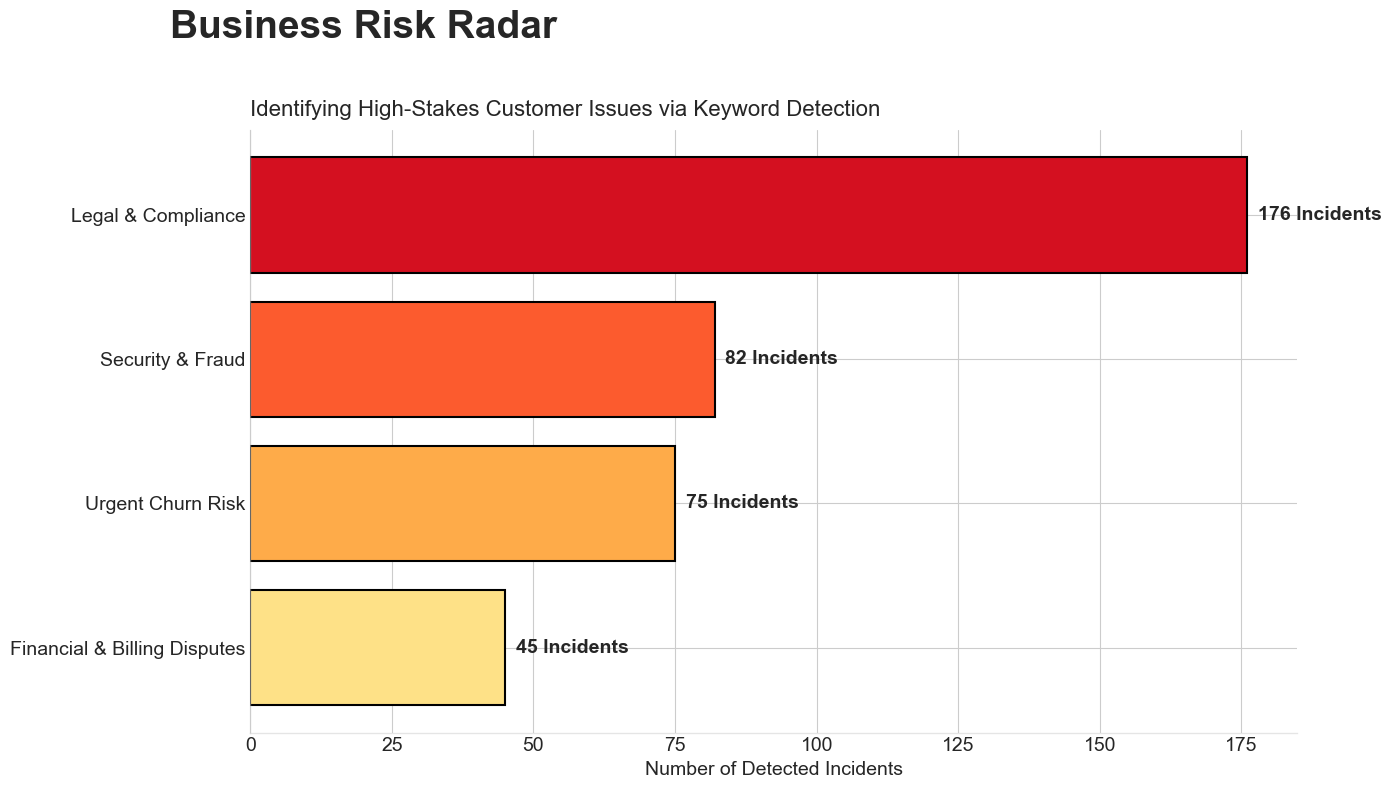

In [9]:
# --- The Professional Visualization: Alert-Themed Bar Chart ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Create an alert-themed color palette
colors = sns.color_palette("YlOrRd_r", n_colors=len(risk_df))

# Create the horizontal bar plot
bars = ax.barh(risk_df['Risk Category'], risk_df['Count'], color=colors, edgecolor='black', linewidth=1.5)

# --- Title and Subtitle ---
fig.suptitle('Business Risk Radar', fontsize=28, weight='bold', x=0.125, y=0.98, ha='left')
ax.set_title('Identifying High-Stakes Customer Issues via Keyword Detection', fontsize=16, loc='left', pad=10)

# --- Styling and Annotations ---
ax.invert_yaxis() # Display the highest risk at the top
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x))) # Format x-axis as integers
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Number of Detected Incidents', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.spines['left'].set_alpha(0.5)

# Add data labels on the bars
for bar in bars:
    width = bar.get_width()
    if width > 0:
        ax.text(width + (ax.get_xlim()[1] * 0.01), bar.get_y() + bar.get_height() / 2,
                f'{int(width)} Incidents',
                ha='left', va='center', fontsize=14, weight='bold')

props = dict(boxstyle='round,pad=0.5', facecolor='ivory', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()